In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
train_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
val_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')
print(f"Dataset shape: {train_df.shape}")
print(train_df.head())
train_df

Dataset shape: (74681, 4)
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


Training dataset shape: (74681, 4)
Validation dataset shape: (999, 4)

First few rows:
     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  

DATASET OVERVIEW
Training samples: 74681
Validation samples: 999
Total samples: 75680

Missing values:
id             0
entity         0
sentiment      0
text         686
dtype: int64

Sentiment distribution in training data:
sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Sentiment percentages:
sentiment
N

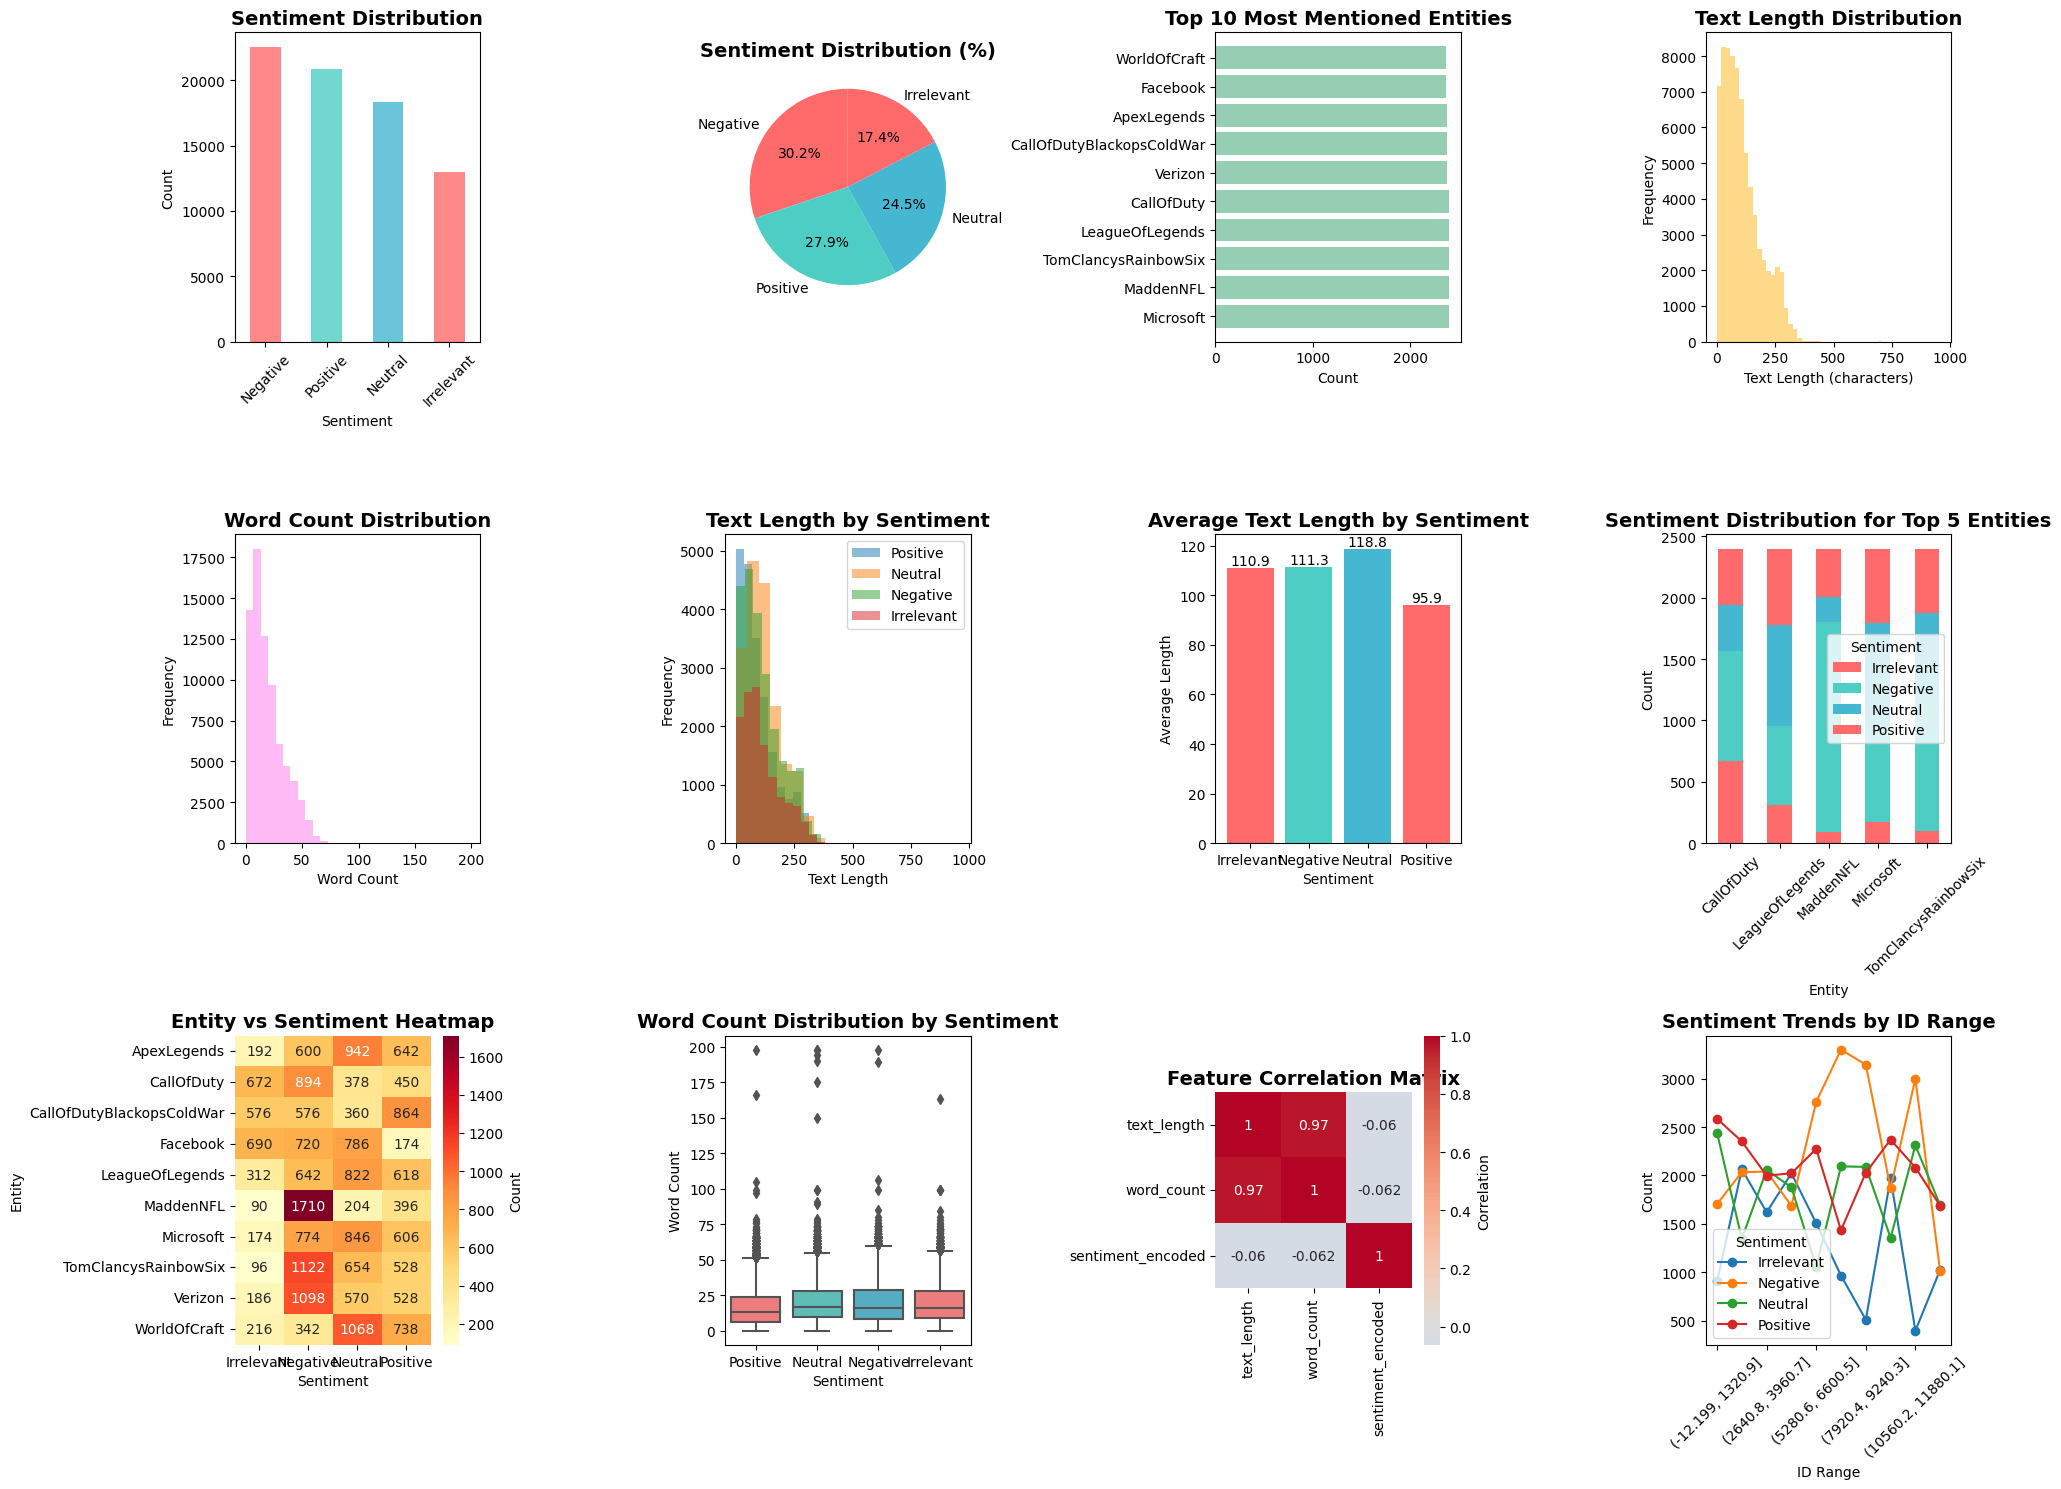


TEXT PREPROCESSING
Sample of cleaned text:
Original: I am coming to the borders and I will kill you all,
Cleaned:  i am coming to the borders and i will kill you all
--------------------------------------------------
Original: im getting on borderlands and i will kill you all,
Cleaned:  im getting on borderlands and i will kill you all
--------------------------------------------------
Original: im coming on borderlands and i will murder you all,
Cleaned:  im coming on borderlands and i will murder you all
--------------------------------------------------

GENERATING WORD CLOUDS


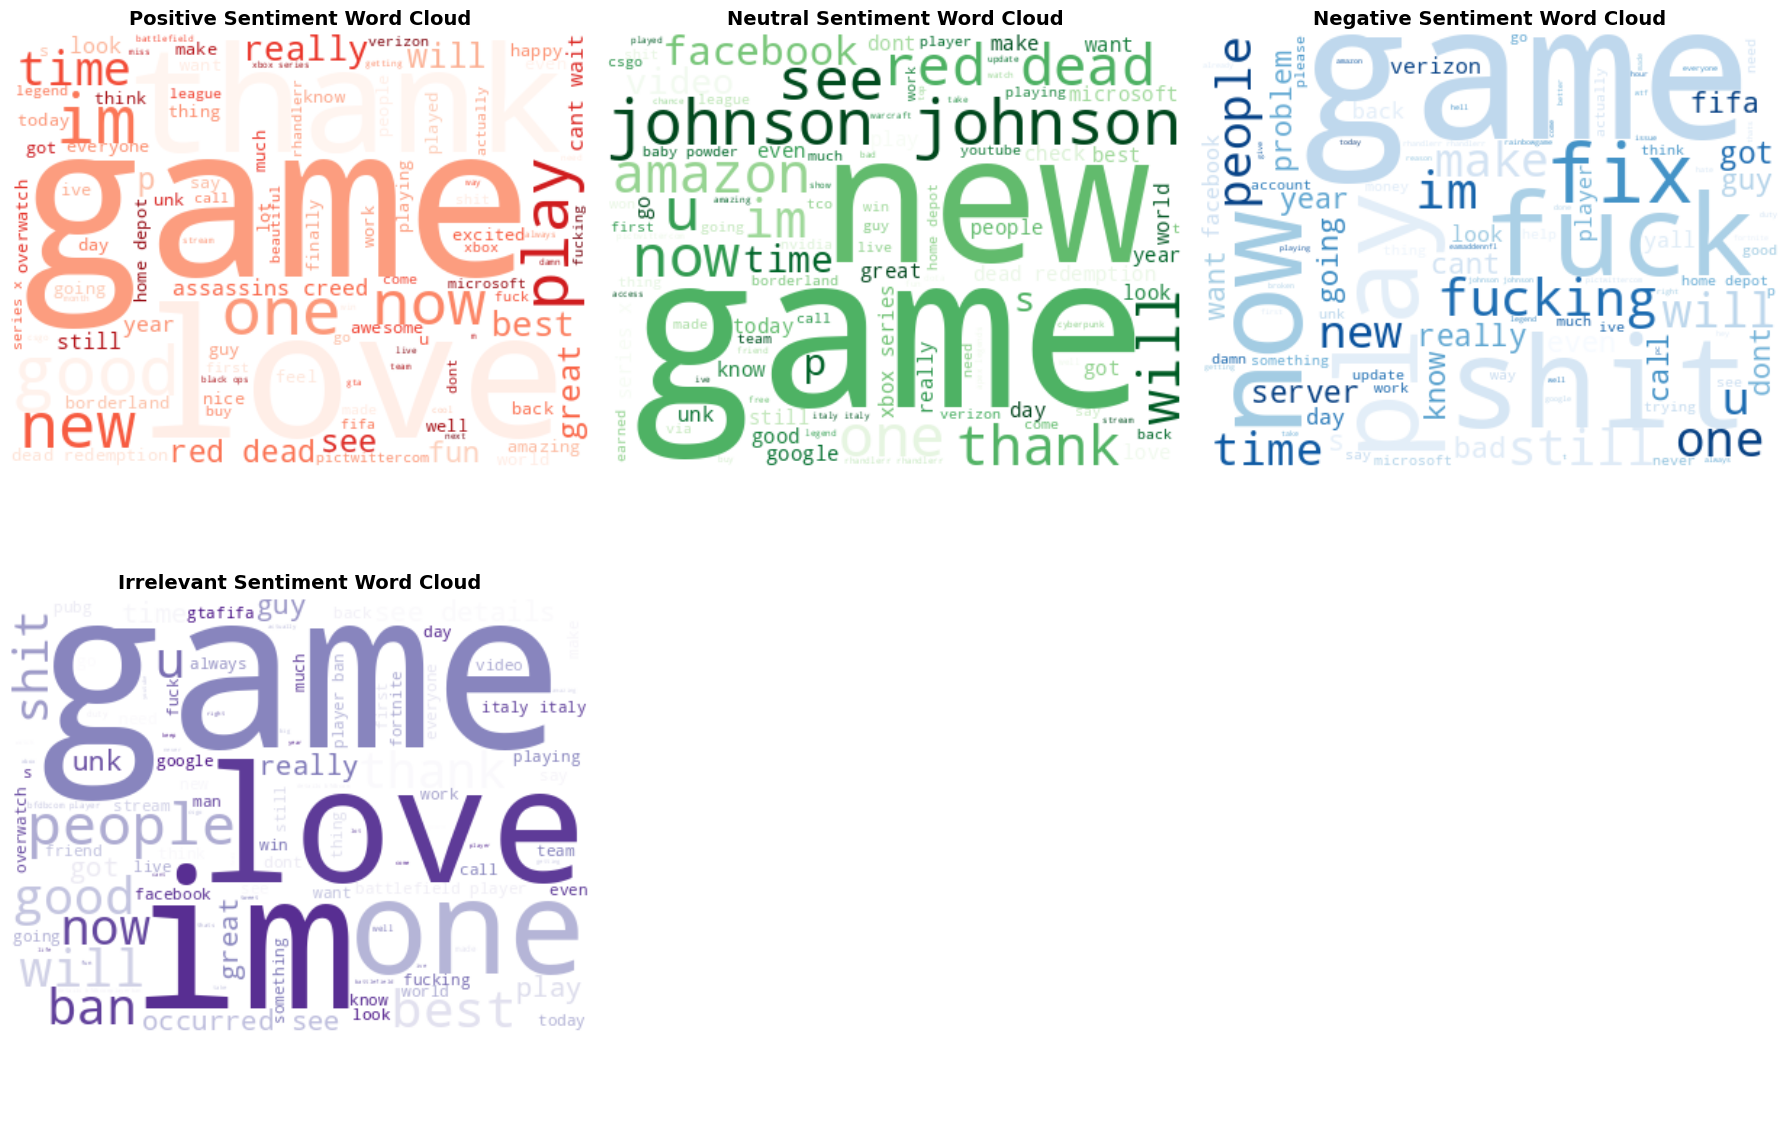


MACHINE LEARNING MODEL TRAINING

Training Random Forest Classifier...
Random Forest Accuracy: 0.9660
Classification Report for Random Forest:
              precision    recall  f1-score   support

  Irrelevant       0.97      0.96      0.97       171
    Negative       0.97      0.97      0.97       266
     Neutral       0.99      0.96      0.97       285
    Positive       0.94      0.97      0.96       277

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999


MODEL PERFORMANCE VISUALIZATION

RANDOM FOREST MODEL PERFORMANCE VISUALIZATION


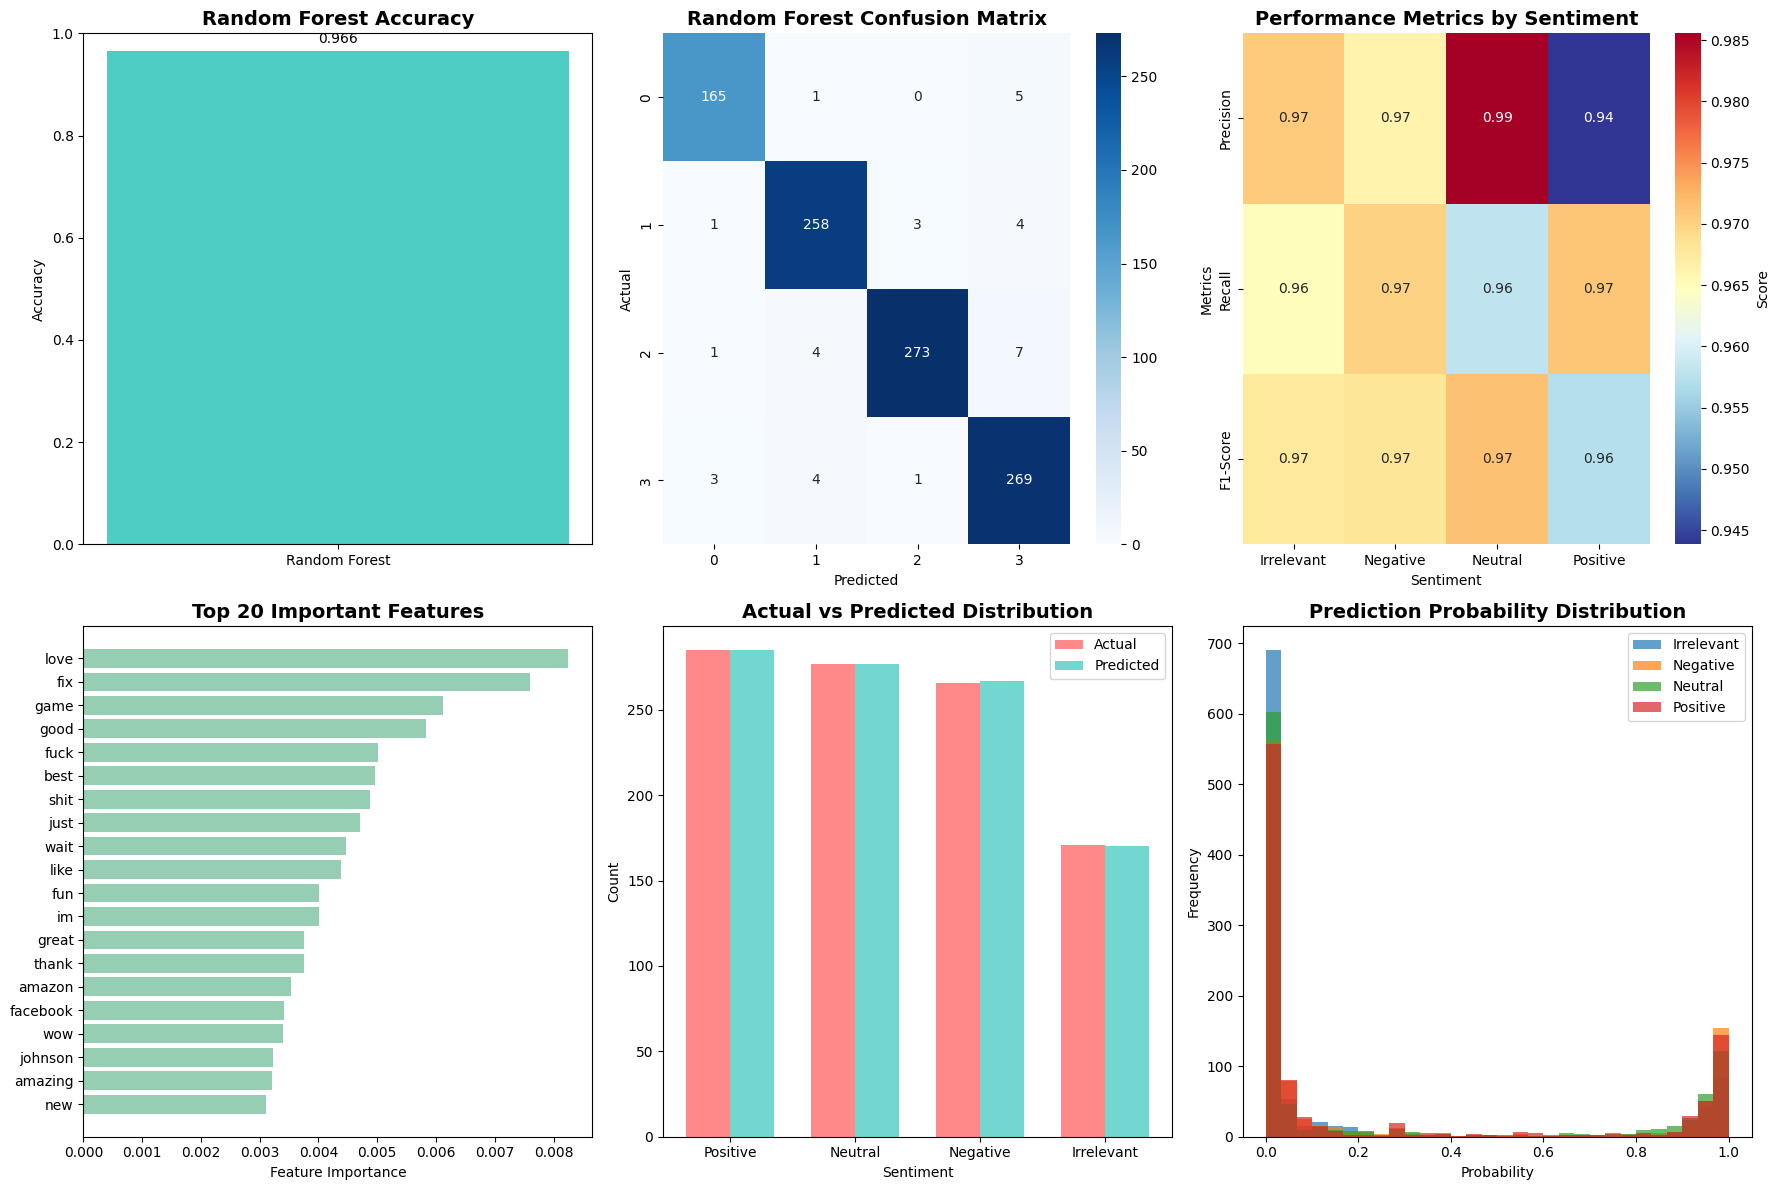


DETAILED ANALYSIS AND INSIGHTS
Random Forest Model Performance:
Accuracy: 0.9660

Top 10 Most Important Features:
 1. love                 - 0.0082
 2. fix                  - 0.0076
 3. game                 - 0.0061
 4. good                 - 0.0058
 5. fuck                 - 0.0050
 6. best                 - 0.0050
 7. shit                 - 0.0049
 8. just                 - 0.0047
 9. wait                 - 0.0045
10. like                 - 0.0044

Sentiment Analysis by Top Entities:
Sentiment percentages for top 5 entities:
sentiment             Irrelevant  Negative  Neutral  Positive
entity                                                       
CallOfDuty                 28.07     37.34    15.79     18.80
LeagueOfLegends            13.03     26.82    34.34     25.81
MaddenNFL                   3.75     71.25     8.50     16.50
Microsoft                   7.25     32.25    35.25     25.25
TomClancysRainbowSix        4.00     46.75    27.25     22.00

Most positive entities:
entity


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost as xgb
import warnings
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Load the dataset
train_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
val_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

# Fix column names (assuming the structure from your output)
train_df.columns = ['id', 'entity', 'sentiment', 'text']
val_df.columns = ['id', 'entity', 'sentiment', 'text']

print(f"Training dataset shape: {train_df.shape}")
print(f"Validation dataset shape: {val_df.shape}")
print("\nFirst few rows:")
print(train_df.head())

# Basic dataset information
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Total samples: {len(train_df) + len(val_df)}")

# Check for missing values
print("\nMissing values:")
print(train_df.isnull().sum())

# Sentiment distribution
print("\nSentiment distribution in training data:")
sentiment_counts = train_df['sentiment'].value_counts()
print(sentiment_counts)
print("\nSentiment percentages:")
print(train_df['sentiment'].value_counts(normalize=True) * 100)

# Entity distribution
print("\nTop 10 entities:")
entity_counts = train_df['entity'].value_counts()
print(entity_counts.head(10))

# Text length analysis
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()

print(f"\nText statistics:")
print(f"Average text length: {train_df['text_length'].mean():.2f}")
print(f"Average word count: {train_df['word_count'].mean():.2f}")

# ==========================================
# VISUALIZATION SECTION
# ==========================================

plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# 1. Sentiment Distribution
plt.subplot(3, 4, 1)
sentiment_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 2. Sentiment Distribution Pie Chart
plt.subplot(3, 4, 2)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Sentiment Distribution (%)', fontsize=14, fontweight='bold')

# 3. Top 10 Entities
plt.subplot(3, 4, 3)
top_entities = entity_counts.head(10)
plt.barh(range(len(top_entities)), top_entities.values, color='#96CEB4')
plt.yticks(range(len(top_entities)), top_entities.index)
plt.title('Top 10 Most Mentioned Entities', fontsize=14, fontweight='bold')
plt.xlabel('Count')

# 4. Text Length Distribution
plt.subplot(3, 4, 4)
plt.hist(train_df['text_length'], bins=50, alpha=0.7, color='#FECA57')
plt.title('Text Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

# 5. Word Count Distribution
plt.subplot(3, 4, 5)
plt.hist(train_df['word_count'], bins=30, alpha=0.7, color='#FF9FF3')
plt.title('Word Count Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# 6. Sentiment by Text Length
plt.subplot(3, 4, 6)
for sentiment in train_df['sentiment'].unique():
    data = train_df[train_df['sentiment'] == sentiment]['text_length']
    plt.hist(data, alpha=0.5, label=sentiment, bins=20)
plt.title('Text Length by Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()

# 7. Average Text Length by Sentiment
plt.subplot(3, 4, 7)
avg_length = train_df.groupby('sentiment')['text_length'].mean()
bars = plt.bar(avg_length.index, avg_length.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Average Text Length by Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Average Length')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom')

# 8. Sentiment Distribution for Top 5 Entities
plt.subplot(3, 4, 8)
top_5_entities = entity_counts.head(5).index
entity_sentiment = train_df[train_df['entity'].isin(top_5_entities)]
pivot_table = entity_sentiment.pivot_table(values='id', index='entity', 
                                         columns='sentiment', aggfunc='count', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca(), 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Sentiment Distribution for Top 5 Entities', fontsize=14, fontweight='bold')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

# 9. Heatmap of Entity vs Sentiment
plt.subplot(3, 4, 9)
# Create heatmap for top 10 entities
top_10_entities = entity_counts.head(10).index
entity_sentiment_top = train_df[train_df['entity'].isin(top_10_entities)]
heatmap_data = entity_sentiment_top.pivot_table(values='id', index='entity', 
                                              columns='sentiment', aggfunc='count', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Entity vs Sentiment Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Entity')

# 10. Box plot of word count by sentiment
plt.subplot(3, 4, 10)
sns.boxplot(data=train_df, x='sentiment', y='word_count', 
           palette=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Word Count Distribution by Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')

# 11. Correlation between text features
plt.subplot(3, 4, 11)
# Encode sentiment for correlation
le = LabelEncoder()
train_df['sentiment_encoded'] = le.fit_transform(train_df['sentiment'])
correlation_data = train_df[['text_length', 'word_count', 'sentiment_encoded']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# 12. Sentiment trends (if we can extract some time-based info from IDs)
plt.subplot(3, 4, 12)
# Create sentiment trends by ID ranges (as proxy for time)
train_df['id_range'] = pd.cut(train_df['id'], bins=10)
sentiment_trends = train_df.groupby('id_range')['sentiment'].value_counts().unstack()
sentiment_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Sentiment Trends by ID Range', fontsize=14, fontweight='bold')
plt.xlabel('ID Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

# ==========================================
# TEXT PREPROCESSING AND FEATURE EXTRACTION
# ==========================================

def clean_text(text):
    """Clean and preprocess text data"""
    # Handle missing values
    if pd.isna(text) or text is None:
        return ""
    
    # Convert to string if not already
    text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.strip()

# Clean text data
print("\n" + "="*50)
print("TEXT PREPROCESSING")
print("="*50)

train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)

print("Sample of cleaned text:")
for i in range(3):
    print(f"Original: {train_df['text'].iloc[i]}")
    print(f"Cleaned:  {train_df['cleaned_text'].iloc[i]}")
    print("-" * 50)

# ==========================================
# WORD CLOUD VISUALIZATION
# ==========================================

print("\n" + "="*50)
print("GENERATING WORD CLOUDS")
print("="*50)

# Create word clouds for each sentiment
sentiments = train_df['sentiment'].unique()
colors = ['Reds', 'Greens', 'Blues', 'Purples', 'Oranges']  # More colors available
num_sentiments = len(sentiments)

# Create dynamic subplot layout
cols = min(3, num_sentiments)
rows = (num_sentiments + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))

# Handle single row case
if rows == 1:
    axes = [axes] if num_sentiments == 1 else axes
else:
    axes = axes.flatten()

for idx, sentiment in enumerate(sentiments):
    sentiment_text = ' '.join(train_df[train_df['sentiment'] == sentiment]['cleaned_text'].dropna())
    
    if len(sentiment_text.strip()) > 0:
        try:
            wordcloud = WordCloud(width=400, height=300, 
                                background_color='white',
                                colormap=colors[idx % len(colors)],  # Use modulo to avoid index error
                                max_words=100).generate(sentiment_text)
            
            axes[idx].imshow(wordcloud, interpolation='bilinear')
            axes[idx].set_title(f'{sentiment} Sentiment Word Cloud', fontsize=14, fontweight='bold')
            axes[idx].axis('off')
        except Exception as e:
            axes[idx].text(0.5, 0.5, f'No words found for\n{sentiment}', 
                          ha='center', va='center', transform=axes[idx].transAxes)
            axes[idx].set_title(f'{sentiment} Sentiment Word Cloud', fontsize=14, fontweight='bold')
            axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, f'No text data for\n{sentiment}', 
                      ha='center', va='center', transform=axes[idx].transAxes)
        axes[idx].set_title(f'{sentiment} Sentiment Word Cloud', fontsize=14, fontweight='bold')
        axes[idx].axis('off')

# Hide extra subplots if any
for idx in range(num_sentiments, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ==========================================
# MACHINE LEARNING MODELS
# ==========================================

print("\n" + "="*50)
print("MACHINE LEARNING MODEL TRAINING")
print("="*50)

# Prepare features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df['cleaned_text'])
X_val = vectorizer.transform(val_df['cleaned_text'])

# Prepare labels
y_train = train_df['sentiment']
y_val = val_df['sentiment']

# Initialize Random Forest model
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Store results
results = {
    'Random Forest': {
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
}
predictions = {'Random Forest': y_pred}

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Classification Report for Random Forest:")
print(classification_report(y_val, y_pred))

# ==========================================
# MODEL COMPARISON VISUALIZATION
# ==========================================

print("\n" + "="*50)
print("MODEL PERFORMANCE VISUALIZATION")
print("="*50)

# ==========================================
# MODEL PERFORMANCE VISUALIZATION
# ==========================================

print("\n" + "="*50)
print("RANDOM FOREST MODEL PERFORMANCE VISUALIZATION")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Model Accuracy (single bar)
axes[0, 0].bar(['Random Forest'], [results['Random Forest']['accuracy']], 
               color='#4ECDC4', width=0.5)
axes[0, 0].set_title('Random Forest Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].text(0, results['Random Forest']['accuracy'] + 0.01, 
                f"{results['Random Forest']['accuracy']:.3f}", 
                ha='center', va='bottom')

# 2. Confusion Matrix
cm = confusion_matrix(y_val, results['Random Forest']['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. Classification Report Heatmap
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_val, y_pred, average=None)
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=rf_model.classes_)

sns.heatmap(metrics_df.T, annot=True, cmap='RdYlBu_r', ax=axes[0, 2], cbar_kws={'label': 'Score'})
axes[0, 2].set_title('Performance Metrics by Sentiment', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Sentiment')
axes[0, 2].set_ylabel('Metrics')

# 4. Feature Importance
feature_names = vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_
top_features_idx = np.argsort(importances)[-20:]

axes[1, 0].barh(range(len(top_features_idx)), importances[top_features_idx], color='#96CEB4')
axes[1, 0].set_yticks(range(len(top_features_idx)))
axes[1, 0].set_yticklabels([feature_names[i] for i in top_features_idx])
axes[1, 0].set_title('Top 20 Important Features', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Feature Importance')

# 5. Prediction Distribution
pred_counts = pd.Series(y_pred).value_counts()
actual_counts = pd.Series(y_val).value_counts()

x = np.arange(len(pred_counts))
width = 0.35

axes[1, 1].bar(x - width/2, actual_counts.values, width, label='Actual', alpha=0.8, color='#FF6B6B')
axes[1, 1].bar(x + width/2, pred_counts.values, width, label='Predicted', alpha=0.8, color='#4ECDC4')
axes[1, 1].set_title('Actual vs Predicted Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(pred_counts.index)
axes[1, 1].legend()

# 6. Prediction Probabilities Distribution
prob_data = results['Random Forest']['probabilities']
for i, sentiment in enumerate(rf_model.classes_):
    axes[1, 2].hist(prob_data[:, i], alpha=0.7, label=sentiment, bins=30)
axes[1, 2].set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Probability')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# ==========================================
# DETAILED ANALYSIS AND INSIGHTS
# ==========================================

print("\n" + "="*50)
print("DETAILED ANALYSIS AND INSIGHTS")
print("="*50)

# Random Forest model performance
print(f"Random Forest Model Performance:")
print(f"Accuracy: {results['Random Forest']['accuracy']:.4f}")

# Feature importance analysis
feature_names = vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_
top_features_idx = np.argsort(importances)[-10:]

print(f"\nTop 10 Most Important Features:")
for i, idx in enumerate(reversed(top_features_idx)):
    print(f"{i+1:2d}. {feature_names[idx]:20s} - {importances[idx]:.4f}")

# Sentiment analysis by entity
print("\nSentiment Analysis by Top Entities:")
top_entities_analysis = train_df[train_df['entity'].isin(top_entities.head(5).index)]
entity_sentiment_analysis = top_entities_analysis.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)
entity_sentiment_pct = entity_sentiment_analysis.div(entity_sentiment_analysis.sum(axis=1), axis=0) * 100

print("Sentiment percentages for top 5 entities:")
print(entity_sentiment_pct.round(2))

# Most positive and negative entities
positive_entities = entity_sentiment_pct.sort_values('Positive', ascending=False)
negative_entities = entity_sentiment_pct.sort_values('Negative', ascending=False)

print(f"\nMost positive entities:")
print(positive_entities.head(3)['Positive'])
print(f"\nMost negative entities:")
print(negative_entities.head(3)['Negative'])

# Text characteristics by sentiment
print(f"\nText characteristics by sentiment:")
text_stats = train_df.groupby('sentiment').agg({
    'text_length': ['mean', 'std'],
    'word_count': ['mean', 'std']
}).round(2)
print(text_stats)

# Model prediction analysis
print(f"\nModel Prediction Analysis:")
pred_distribution = pd.Series(y_pred).value_counts()
actual_distribution = pd.Series(y_val).value_counts()

print("Prediction vs Actual Distribution:")
comparison_df = pd.DataFrame({
    'Actual': actual_distribution,
    'Predicted': pred_distribution
})
print(comparison_df)

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("Key findings:")
print("1. Dataset contains", len(train_df), "training samples and", len(val_df), "validation samples")
print("2. Sentiment distribution:", dict(train_df['sentiment'].value_counts()))
print("3. Random Forest model achieved", f"{results['Random Forest']['accuracy']:.4f}", "accuracy")
print("4. Most mentioned entities:", ", ".join(top_entities.head(3).index))
print("5. Text analysis reveals interesting patterns in length and word count by sentiment")
print("6. Top predictive features:", ", ".join([feature_names[i] for i in reversed(top_features_idx[-3:])]))

# Additional insights
precision, recall, f1, support = precision_recall_fscore_support(y_val, y_pred, average='weighted')
print(f"7. Overall model performance - Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")